In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import pickle
import os


from headers.training import *
from headers.models import *
from headers.A2C_agent import *
from headers.helpers import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data and agents

In [10]:

# # Load all_* dictionaries
# with open('agent1_data/all_dicts.pkl', 'rb') as f:
#     all_critic_losses, all_actor_losses, all_episode_rewards, \
#         all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories = pickle.load(f)

# # Load agent1 dictionary
# with open('agent1_data/agent1.pkl', 'rb') as f:
#     agent1 = pickle.load(f)

# 3.2 Adding complexity: stochastic rewards
### vanilla A2C (fully-online)

In [5]:
# hyperparameters
stochastic_rewards = True
k=1
n=1
total_steps_budget = 500000
device = "cpu"
seeds = [1, 101, 1101]

agent, \
    all_critic_losses, all_actor_losses, all_episode_rewards, \
    all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories \
        = training_loop(seeds, total_steps_budget, k, n, stochastic_rewards, device)

cpu


### training logging info

- losses and rewards are every 1k step
- evaluation rewards and value_trajectories are every 20k steps

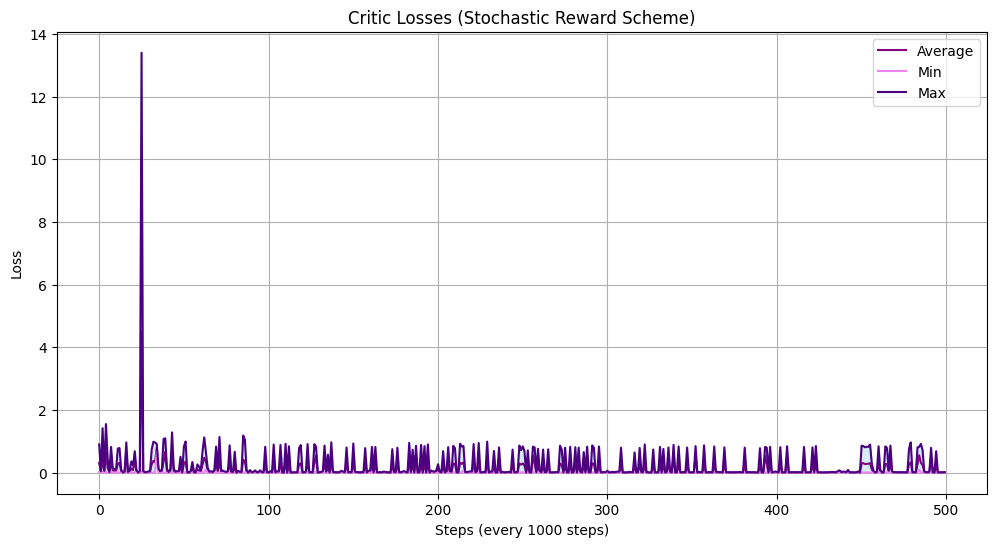

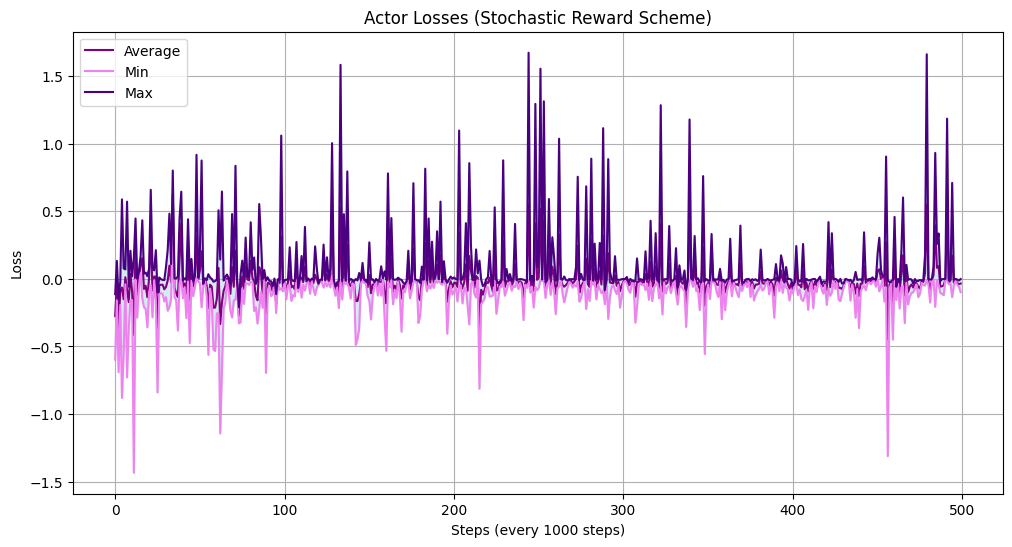

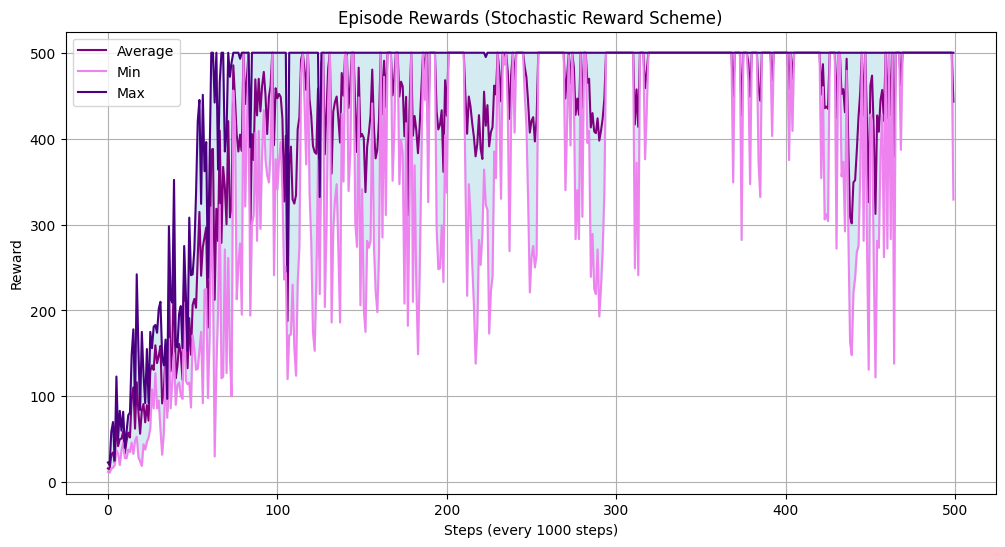

In [7]:
# Get stats 
min_critic_losses, max_critic_losses, avg_critic_losses = get_stats(all_critic_losses)
min_actor_losses, max_actor_losses, avg_actor_losses = get_stats(all_actor_losses)
min_episode_rewards, max_episode_rewards, avg_episode_rewards = get_stats(all_episode_rewards)

save_plots = False
folder_name = 'agent1_stoch'

# Plot stats 
plot_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, title='Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

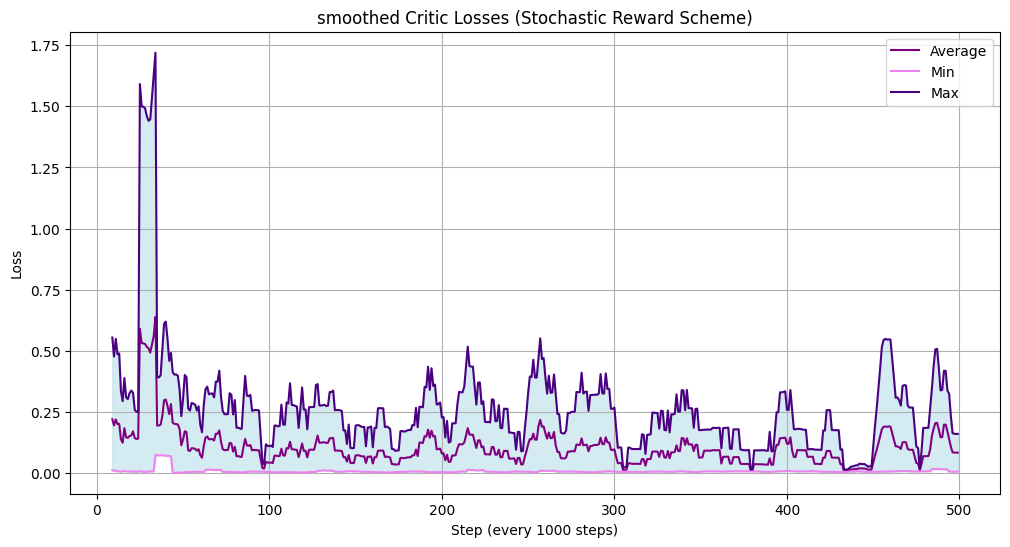

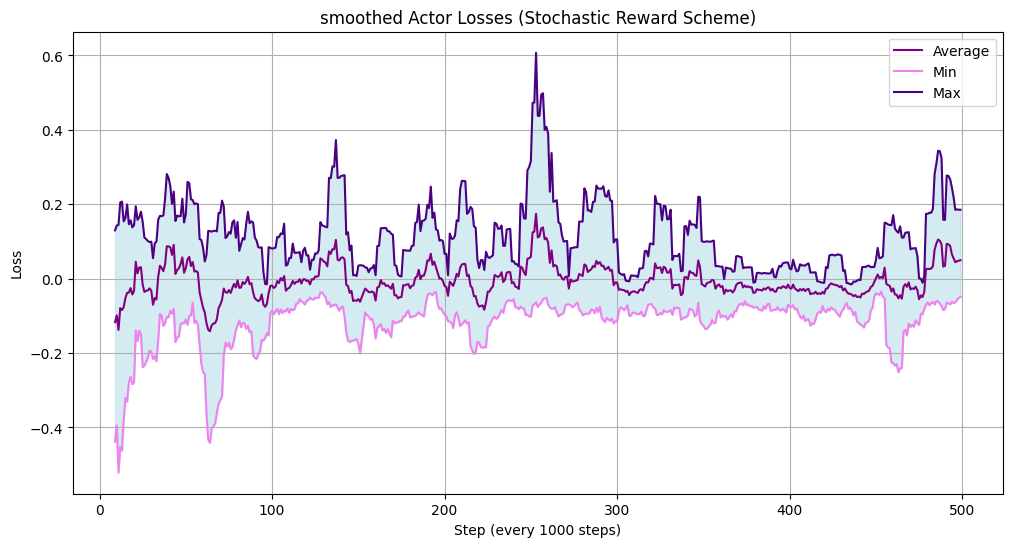

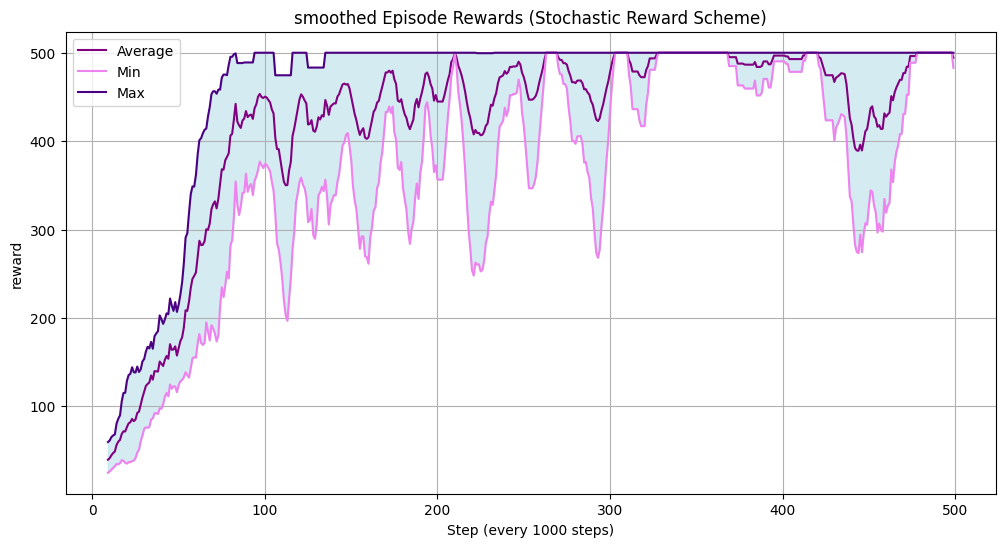

In [8]:
# Plot smoothed stats 
window_size = 10

plot_smoothed_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, window_size, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, window_size, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, window_size, title='Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

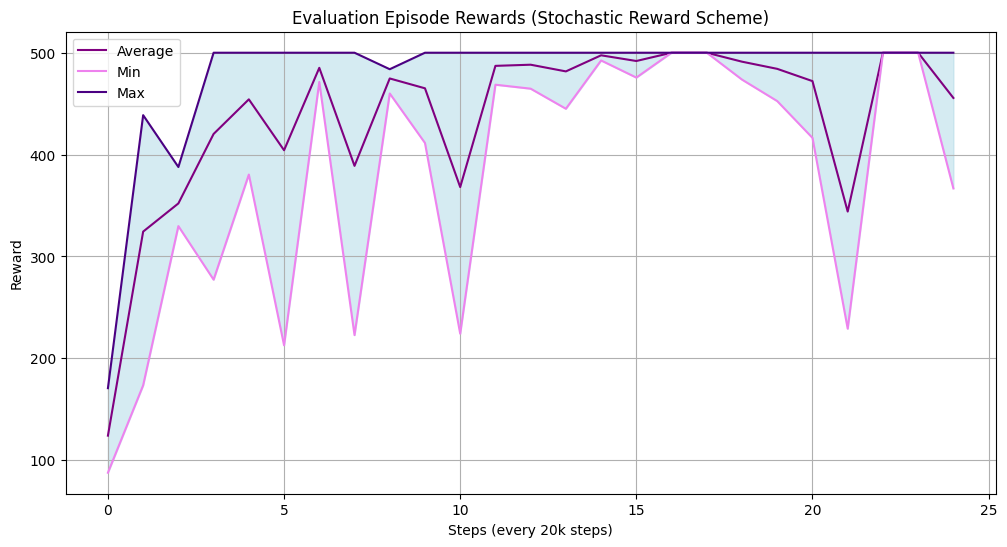

In [9]:
# Get stats for evaluation rewards
min_eval_rew, max_eval_rew, avg_eval_rew = get_stats(all_evaluation_reward_means)

# Plot stats
plot_smoothed_stats(save_plots, folder_name, min_eval_rew, max_eval_rew, avg_eval_rew, window_size, title='Evaluation Episode Rewards',ylabel='Reward',xlabel='Steps (every 20k steps)')

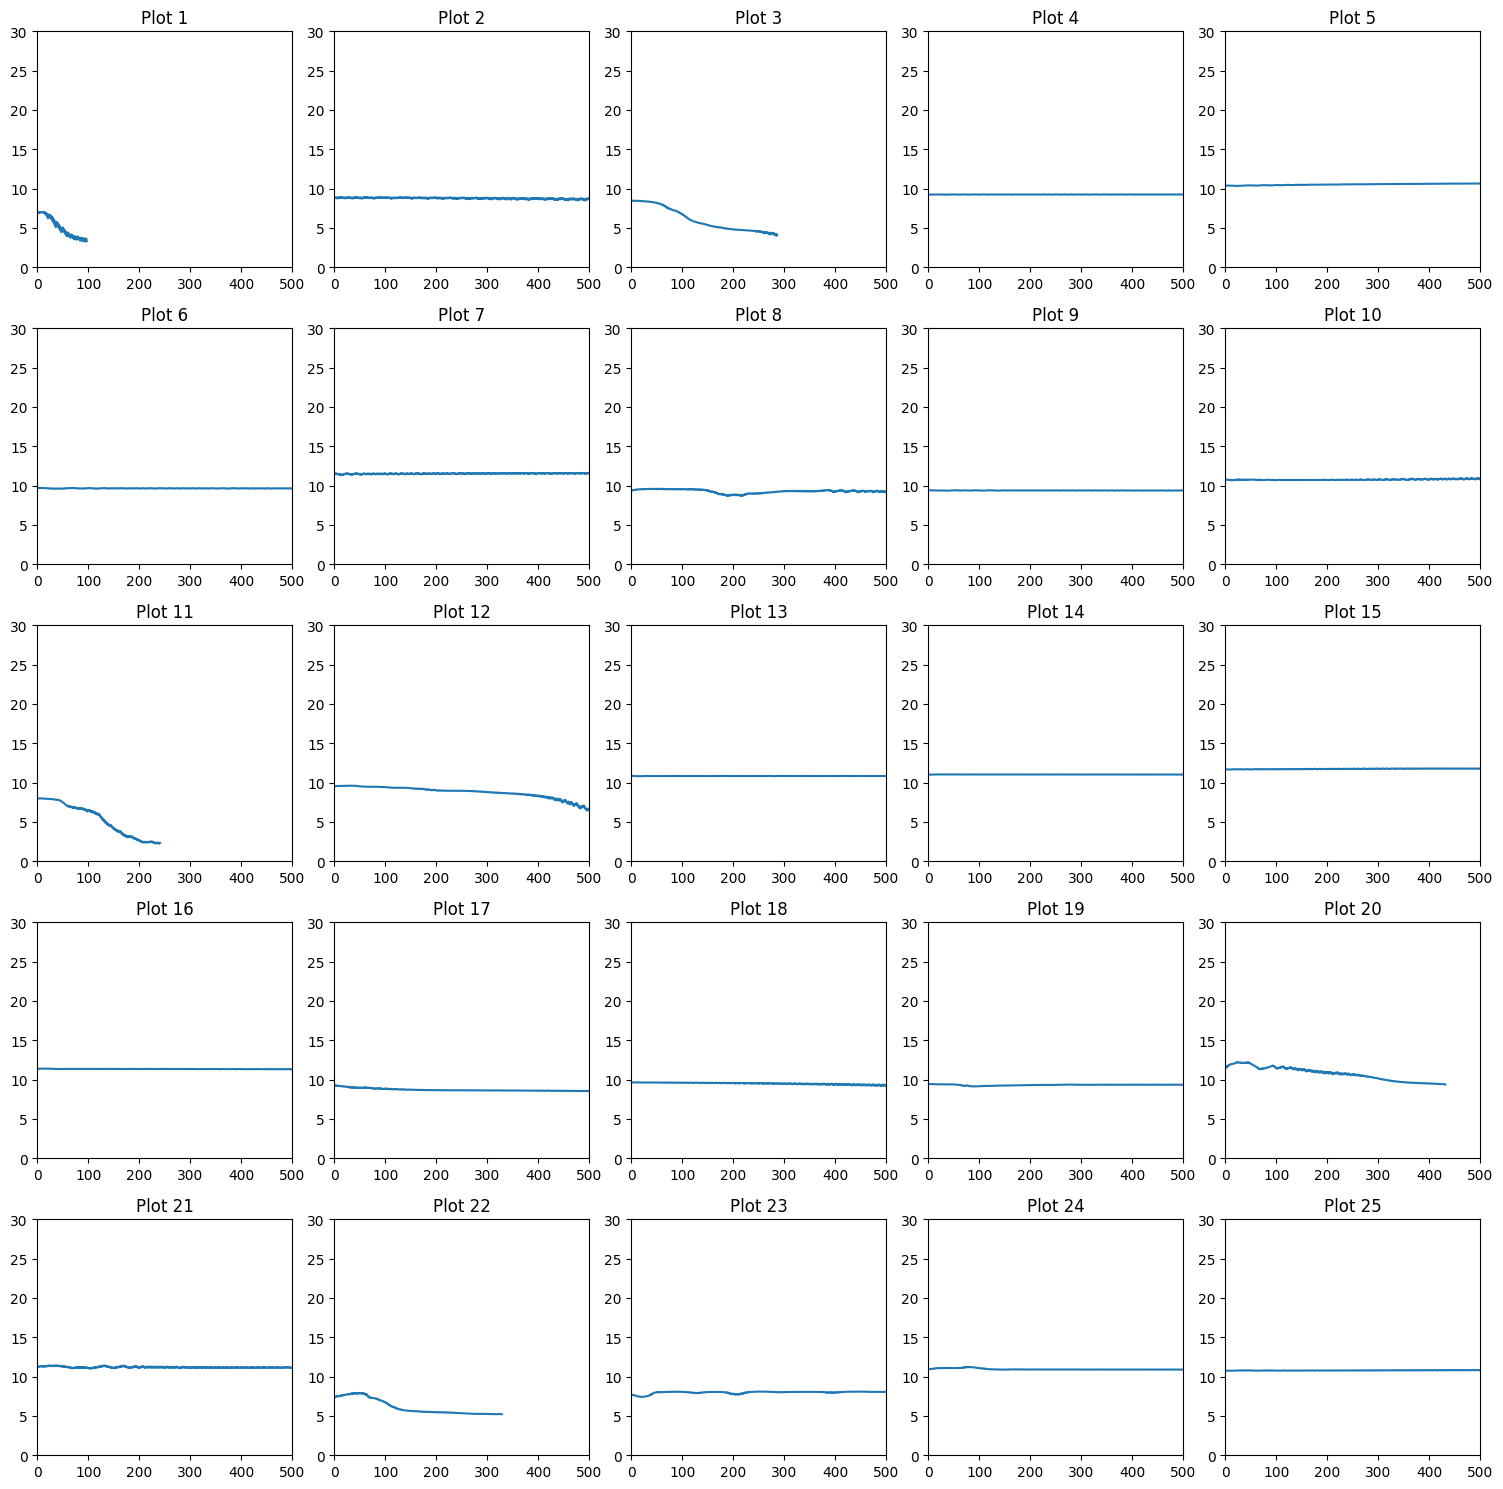

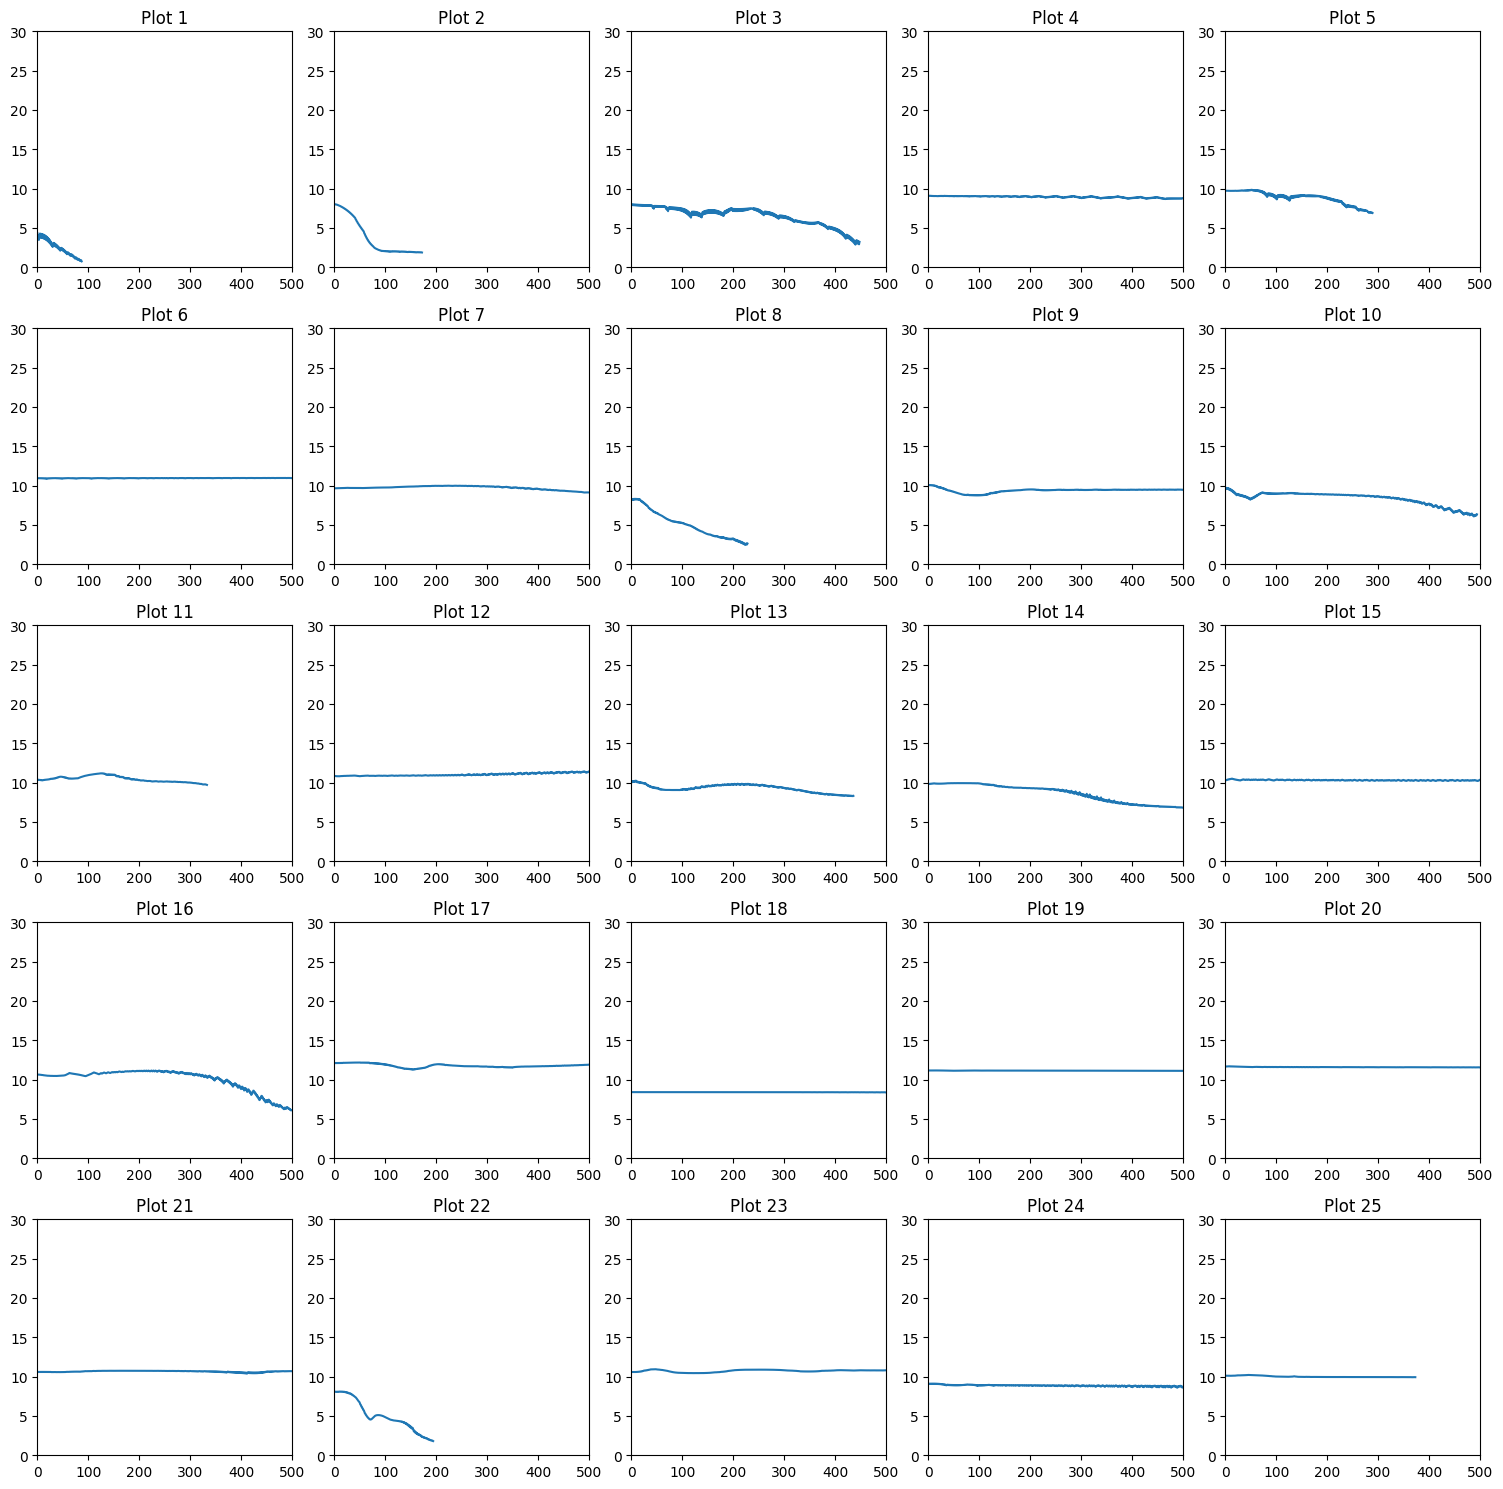

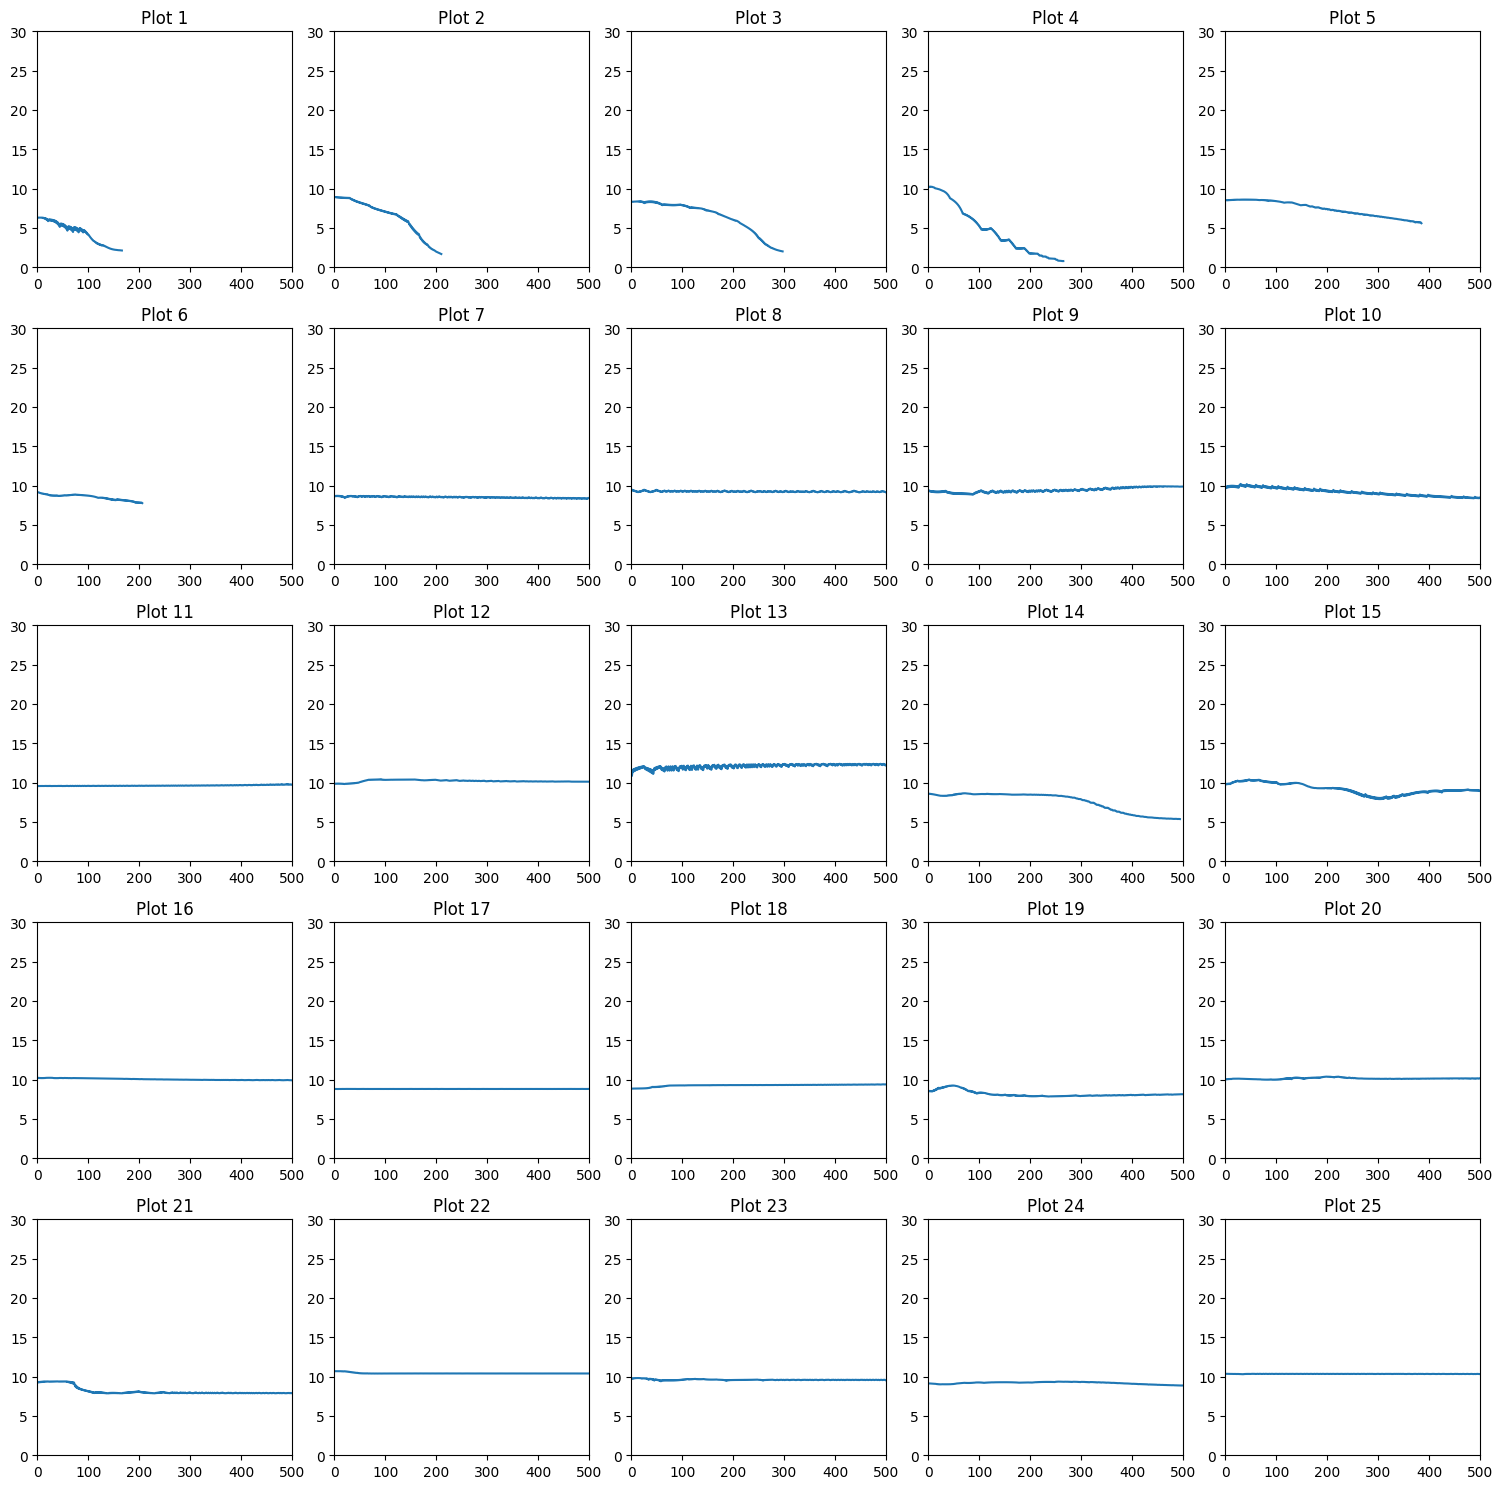

In [10]:
plot_and_save_trajectories(save_plots, folder_name, all_evaluation_value_trajectories, x_range=[0, 500], y_range=[0, 150])


### Saving agents and data

In [ ]:
# # Save all_* dictionaries
folder_name = "data_agent1_stoch"
os.makedirs(folder_name, exist_ok=True)

with open(folder_name+'/all_dicts.pkl', 'wb') as f:
    pickle.dump([all_critic_losses, all_actor_losses, all_episode_rewards, \
                 all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories], f)

# Save agent1 dictionary
with open(folder_name+'/agent.pkl', 'wb') as f:
    pickle.dump(agent, f)

with open(folder_name+'/seeds.pkl', 'wb') as f:
    pickle.dump(seeds, f)